In [1]:
# import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# read the dataset and display some rows
dataset = pd.read_csv('Dataset/Dataset.csv')
dataset.head()

,TIMESTAMP,A,B,C
0,2022032101,0,208,0
1,2022032103,0,225,0
2,2022032104,0,223,0
3,2022032104,0,221,0
4,2022032105,0,221,0


In [2]:
# find length of dataset
len(dataset)

28735

In [3]:
# describe the info about data
dataset.describe()

,TIMESTAMP,A,B,C
count,2.873500e+04,28735.000000,28735.000000,28735.000000
mean,2.022073e+09,3.567844,289.962624,441.588759
std,1.911921e+04,3.551819,39.252154,454.408925
min,2.022032e+09,0.000000,172.000000,0.000000
25%,2.022060e+09,0.000000,259.000000,0.000000
50%,2.022072e+09,3.000000,297.000000,725.000000
75%,2.022091e+09,7.000000,319.000000,860.000000
max,2.022103e+09,9.000000,434.000000,5932.000000


In [4]:
# find either there are any null values
dataset.isnull().sum()

TIMESTAMP    0
A            0
B            0
C            0
dtype: int64

In [5]:
dataset.columns

Index(['TIMESTAMP', 'A', 'B', 'C'], dtype='object')

In [7]:
# change date into the required date time stamp
from datetime import datetime
dataset['TIMESTAMP'] = dataset['TIMESTAMP'].astype(str).apply(lambda x: datetime.strptime(x, "%Y%m%d%H"))
dataset.head()

,TIMESTAMP,A,B,C
0,2022-03-21 01:00:00,0,208,0
1,2022-03-21 03:00:00,0,225,0
2,2022-03-21 04:00:00,0,223,0
3,2022-03-21 04:00:00,0,221,0
4,2022-03-21 05:00:00,0,221,0


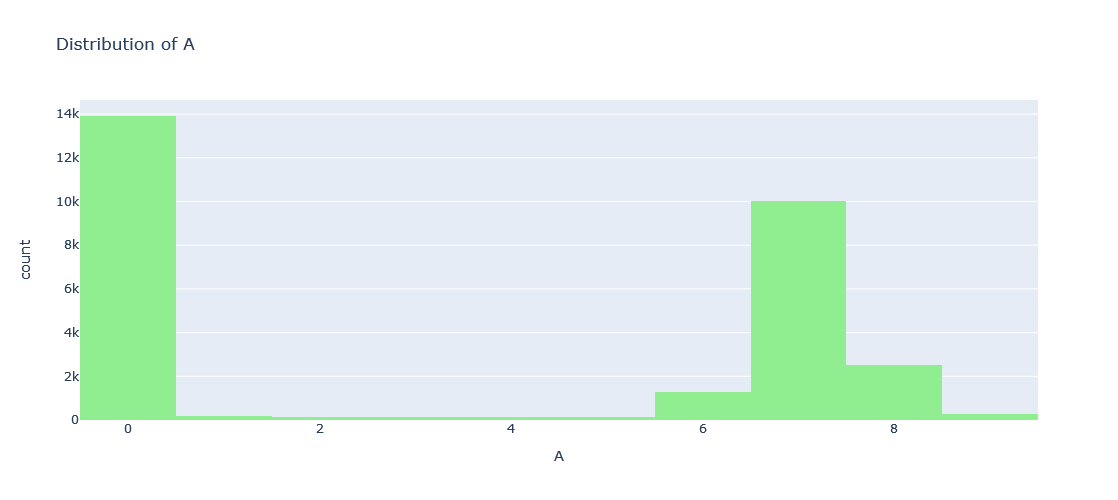

In [24]:
# lets plot a histogram to interpret vairable A
fig = px.histogram(dataset, x = 'A', nbins = 10, title = 'Distribution of A', color_discrete_sequence = ['lightgreen'], height = 500)
fig.show()

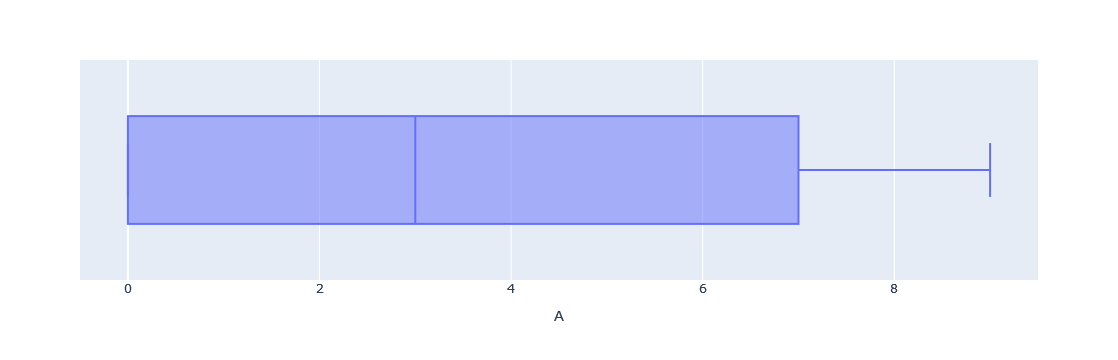

In [28]:
# the data in A column does not seems to be normal so lets plot a boxplot to see more about data
fig = px.box(dataset, x = 'A')
fig.show()

In [35]:
# now find outliers and other features of boxplot
data = dataset['A']

# find max and min
max_no = np.max(data)
min_no = np.min(data)

# now find percentiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

# find inter quartile range
IQR = q3 - q1

L_bound = q1 - 1.5*IQR
U_bound = q3 + 1.5*IQR

# find outliers
Outliers = [] 
for i in data:
    if i < L_bound or i > U_bound:
        Outliers.append(i)

print("Potential Outliers are ", Outliers)
        

Potential Outliers are  []
